In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
#Função de tratamento de dataset

def tratamento(df):
    #df['TOTALCHARGES'] = df['TOTALCHARGES'].astype('float64');

    df.replace('Yes', 1, inplace=True);
    df.replace('No', 0, inplace=True);

    return df;

In [2]:
# Carregando o dataset

df = pd.read_csv("dataset.csv");
df.shape

(5434, 21)

In [3]:
#Visualização e percepções de dados
#Análise univariada
#Análise bivariada / multivariada
#Pivot
#Possíveis ajustes e tratamento dos dados
#Feature engineering
#Verificações de suposição do(s) modelo(s) de Aprendizado de
#Máquina
#Preparação de dados para o(s) modelo(s)

Podemos usar os métodos `.info()`, `.value_counts()` e `.describe()` para obter informações básicas sobre quantidade presente dos dados, tipos e valores deles.

In [4]:
df = tratamento(df);
print(df.shape);
df.info()

(4106, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4106 entries, 0 to 4547
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                4106 non-null   int64  
 1   GENDER            4106 non-null   int64  
 2   SENIORCITIZEN     4106 non-null   float64
 3   PARTNER           4106 non-null   int64  
 4   DEPENDENTS        4106 non-null   int64  
 5   TENURE            4106 non-null   float64
 6   PHONESERVICE      4106 non-null   int64  
 7   MULTIPLELINES     4106 non-null   int64  
 8   INTERNETSERVICE   4106 non-null   int64  
 9   ONLINESECURITY    4106 non-null   int64  
 10  ONLINEBACKUP      4106 non-null   int64  
 11  DEVICEPROTECTION  4106 non-null   int64  
 12  TECHSUPPORT       4106 non-null   int64  
 13  STREAMINGTV       4106 non-null   int64  
 14  STREAMINGMOVIES   4106 non-null   int64  
 15  CONTRACT          4106 non-null   int64  
 16  PAPERLESSBILLING  4106 non-null

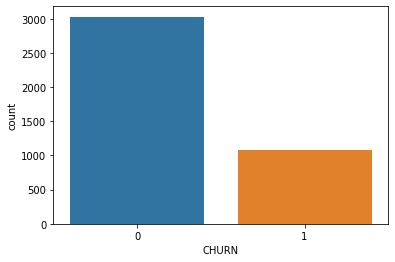

In [5]:
#Observa-se que o dataset está desbalanceado

risk_plot = sns.countplot(data=df, x='CHURN', order=df['CHURN'].value_counts().index)
plt.show()

## Criação do modelo

Para conseguir avaliar o desempenho do nosso modelo, vamos dividir os dados que temos entre dados de treino e de teste, e assim, após o treinamento, verificar como ele está se saindo com as predições.

In [6]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE


In [7]:
clean_df = df;

In [11]:
clean_df.columns.size
#print(clean_df.columns);

#Analisando a correlação entre cada coluna e a coluna objetivo para a escolha de parâmetros:
abs(clean_df[clean_df.columns[:]].corr())['CHURN'][:].sort_values(ascending=False)

CHURN               1.000000
CONTRACT            0.398171
TENURE              0.358111
INTERNETSERVICE     0.314863
ONLINESECURITY      0.284204
TECHSUPPORT         0.284006
PAYMENTMETHOD       0.282370
ONLINEBACKUP        0.265068
DEVICEPROTECTION    0.259771
STREAMINGMOVIES     0.223920
STREAMINGTV         0.223664
PAPERLESSBILLING    0.203243
TOTALCHARGES        0.203189
DEPENDENTS          0.162725
SENIORCITIZEN       0.152072
PARTNER             0.149045
MONTHLYCHARGES      0.096750
GENDER              0.022519
PHONESERVICE        0.009270
ID                  0.008961
MULTIPLELINES       0.000023
Name: CHURN, dtype: float64

Foram escolhidos como parâmetros colunas com correlação maior que 0.02 para com a variável objetivo.


In [12]:

features = ['GENDER', 'SENIORCITIZEN', 'PARTNER', 'DEPENDENTS', 'TENURE',
       'INTERNETSERVICE', 'ONLINESECURITY',
       'ONLINEBACKUP', 'DEVICEPROTECTION', 'TECHSUPPORT', 'STREAMINGTV',
       'STREAMINGMOVIES', 'CONTRACT', 'PAPERLESSBILLING', 'PAYMENTMETHOD',
       'MONTHLYCHARGES', 'TOTALCHARGES']

target = ['CHURN']

X = clean_df[features]
y = clean_df[target]

CHURN
1        3029
0        3029
dtype: int64

O SMOTE foi a alternativa usada para lidar com o desbalanceamento

In [13]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

y.value_counts()

CHURN
1        3029
0        3029
dtype: int64

Abaixo, separamos os dados que queremos predizer dos dados que utilizamos como informações para a predição.

In [14]:
test_pct = 0.2 # Separaremos 30% dos dados para testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_pct)

model = RandomForestClassifier(n_estimators=999)
model.fit(X_train, y_train.values.ravel())

y_pred = model.predict(X_test);
acc = f1_score(y_test, y_pred);
print(f"Acurácia do modelo (número de predições assertivas sobre número total de testes): {acc}")

Acurácia do modelo (número de predições assertivas sobre número total de testes): 0.8548770816812055


In [15]:
dfa = pd.read_csv("ANSWER.csv");

dfa = tratamento(dfa);

answer = model.predict(dfa[features]);

In [16]:
answer = pd.DataFrame(answer, columns =['CHURN']);
answer.replace(0, 'No', inplace=True);
answer.replace(1, 'Yes', inplace=True);

answer.to_csv('ANSWER.csv',index=False);

In [17]:
answer.value_counts()

CHURN
No       939
Yes      385
dtype: int64